In [1]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use("seaborn")
%matplotlib inline

In [2]:
data_dir = '/Users/adamszabunio/Desktop/granular_raw_data/2017_soil_model/01_raw-data-in/testing/corn/'
corn_yields = pd.read_csv(path.join(data_dir, 'corn_historical_yields_1995_2017.csv'), index_col=0)
print(corn_yields.shape)
corn_yields.head()

(40524, 7)


,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
0,1033,AL,2016,126.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
1,1033,AL,2015,159.1,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
2,1033,AL,2014,191.5,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
3,1033,AL,2013,182.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
4,1033,AL,2012,102.4,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"


In [3]:
corn_y2 = pd.read_csv(path.join(data_dir, 'corn_historical_yields_1975_1994.csv'), index_col=0)
corn_y3 = pd.read_csv(path.join(data_dir, 'corn_historical_yields_1970_1974.csv'), index_col=0)

for df in [corn_y2, corn_y3]:
    corn_yields = corn_yields.append(df)
    corn_yields.reset_index(inplace=True, drop=True)

corn_yields.shape

(99293, 7)

In [4]:
corn_yields.tail()

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
99288,56031,WY,1974,74.7,PLATTE,SOUTHEAST,"WYOMING, SOUTHEAST, PLATTE"
99289,56031,WY,1973,112.4,PLATTE,SOUTHEAST,"WYOMING, SOUTHEAST, PLATTE"
99290,56031,WY,1972,94.0,PLATTE,SOUTHEAST,"WYOMING, SOUTHEAST, PLATTE"
99291,56031,WY,1971,81.0,PLATTE,SOUTHEAST,"WYOMING, SOUTHEAST, PLATTE"
99292,56031,WY,1970,64.0,PLATTE,SOUTHEAST,"WYOMING, SOUTHEAST, PLATTE"


In [5]:
corn_yields.fips_code = corn_yields.fips_code.astype(str).apply(lambda x: x.zfill(5))
corn_yields.head()

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
0,01033,AL,2016,126.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
1,01033,AL,2015,159.1,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
2,01033,AL,2014,191.5,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
3,01033,AL,2013,182.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
4,01033,AL,2012,102.4,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"


# Fips Code clash
- For years 1970 - 1986, fips_code -> 29193 
- For years 1987 - 2016, fips_code -> 29186

In [7]:
corn_yields[corn_yields.fips_code.isin(['29193', '29186'])].sort_values(by='year')

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
93703,29193,MO,1970,50.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93702,29193,MO,1971,77.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93701,29193,MO,1972,69.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93700,29193,MO,1973,77.7,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93699,29193,MO,1974,53.7,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65038,29193,MO,1975,88.3,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65037,29193,MO,1976,88.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65036,29193,MO,1977,84.1,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65035,29193,MO,1978,99.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65034,29193,MO,1979,101.9,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"


# Mapping all fips_code for STE. GENEVIEVE county to 29186
- This resolves a merge error that was happening later when merging with county centroids 

In [18]:
corn_yields.fips_code.replace(to_replace='29193', value='29186', inplace=True)

corn_yields[corn_yields.fips_code == '29186']

In [8]:
corn_yields[corn_yields.fips_code.isin(['46131', '46071'])].sort_values(by='year')

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
96810,46071,SD,1970,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96809,46071,SD,1971,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96808,46071,SD,1972,33.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96944,46131,SD,1973,21.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
96807,46071,SD,1973,29.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96806,46071,SD,1974,13.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77725,46071,SD,1975,20.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78259,46131,SD,1976,27.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
77724,46071,SD,1976,14.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78258,46131,SD,1977,42.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"


# Duplicate information for fips_codes [46131,  46071]
# *** For centroids we will need to map all fips_codes to 46071 ***
## However, the values do not match up for years [1973, 1976] 
## A)
 - Drop fips code 46071 all together?
 
## B) 
 - Average the values for 1973 and 1976? Or drop them?
 - Add the one map the one year (1977) of additional data that is present for 46071 to 46131?

In [11]:
# Even if we choose route B, we only have 29 years of data. 
print(corn_yields[corn_yields.fips_code.isin(['46131', '46071'])].shape[0])

print(len(corn_yields[corn_yields.fips_code.isin(['46131', '46071'])]['year'].unique()))

31
29


# Maping 46071 to 46131 and averageing years 1973 and 1976

In [12]:
corn_yields.fips_code.replace(to_replace='46131', value='46071', inplace=True)

In [13]:
corn_yields.query("fips_code == '46071' and year == 1973")

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
96807,46071,SD,1973,29.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96944,46071,SD,1973,21.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"


In [14]:
y_1973a, y_1973b = corn_yields.nassyield.loc[96807], corn_yields.nassyield.loc[96944]
m_1973 = (y_1973a + y_1973b)/2
print(m_1973)
corn_yields.at[96944, 'nassyield'] = m_1973
corn_yields.drop(96807, inplace=True)

25.4


In [15]:
corn_yields.query("fips_code == '46071' and year == 1976")

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
77724,46071,SD,1976,14.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78259,46071,SD,1976,27.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"


In [16]:
y_1976a, y_1976b = corn_yields.nassyield.loc[77724], corn_yields.nassyield.loc[78259]
m_1976 = (y_1976a + y_1976b)/2
print(m_1976)
corn_yields.at[77724, 'nassyield'] = m_1976
corn_yields.drop(78259, inplace=True)

20.5


In [17]:
corn_yields.query("fips_code == '46071'").sort_values('year')

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
96810,46071,SD,1970,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96809,46071,SD,1971,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96808,46071,SD,1972,33.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96944,46071,SD,1973,25.4,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
96806,46071,SD,1974,13.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77725,46071,SD,1975,20.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77724,46071,SD,1976,20.5,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78258,46071,SD,1977,42.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
77723,46071,SD,1978,50.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77722,46071,SD,1979,45.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"


In [20]:
ts_df = corn_yields.pivot(index='fips_code', columns='year', values='nassyield')
ts_df

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,
01001,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,...,40.0,NaN,NaN,NaN,111.1,NaN,99.3,NaN,NaN,NaN
01003,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,...,105.0,NaN,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9
01005,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,...,103.0,NaN,109.0,79.4,119.6,NaN,153.8,166.3,181.6,188.9
01007,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01009,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,...,NaN,NaN,110.0,NaN,109.5,70.0,137.1,144.0,128.4,NaN
01011,23.0,39.0,39.2,39.7,37.0,37.0,51.0,30.0,36.0,36.9,...,NaN,NaN,NaN,NaN,NaN,142.0,128.0,NaN,NaN,NaN
01013,21.0,36.0,41.5,38.1,36.0,38.0,37.0,22.0,31.9,48.9,...,NaN,NaN,NaN,61.2,NaN,122.2,NaN,102.8,NaN,NaN
01015,26.0,51.0,52.0,50.9,41.0,43.0,50.0,30.0,50.6,67.7,...,90.0,NaN,103.0,118.3,119.6,98.7,117.4,136.2,NaN,NaN
01017,22.0,38.0,45.6,50.7,36.0,43.0,35.0,20.0,33.5,51.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
ts_df.to_csv("/Users/adamszabunio/special_topics/8_final_project/ts_corn_df.csv")

In [21]:
pd.set_option('display.max_columns', 100)
ts_df.describe()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,2391.000000,2395.000000,2453.000000,2474.000000,2522.000000,2502.000000,2514.000000,2520.000000,2443.000000,2419.000000,2399.000000,2389.000000,2382.000000,2342.000000,2342.000000,2331.000000,2296.000000,2280.000000,2245.000000,2235.000000,2170.000000,2199.000000,2230.000000,2145.000000,2149.000000,2067.000000,2111.000000,2077.000000,2092.000000,2067.000000,2047.000000,1991.000000,2054.000000,2025.000000,1982.000000,1971.000000,1921.000000,1896.000000,1585.000000,1553.000000,1718.000000,1633.000000,1686.000000,1546.000000,1562.000000,1433.000000,1507.000000
mean,56.514178,66.973862,73.469955,71.674171,62.681800,68.890568,72.354813,69.448730,78.035203,86.779289,68.635973,87.657597,93.079387,70.959052,91.598377,98.283398,94.196298,97.313509,76.111492,98.401611,96.088756,93.589768,110.102825,87.398555,114.884225,101.002758,109.930649,109.639817,104.384608,105.343058,115.571080,116.844500,101.121081,117.638864,133.821342,123.412582,123.033993,125.379747,130.972240,144.181326,129.921246,125.129455,112.840925,147.340168,156.142125,151.145639,152.632382
std,24.630223,24.987014,25.901538,24.667364,21.256083,23.863414,25.906880,29.815991,26.465330,26.269358,30.727938,28.288624,24.706175,27.091633,27.071137,26.777902,33.359768,29.948936,29.993373,28.427922,32.546057,27.841567,32.405496,32.017086,28.609311,24.035441,30.092846,28.471248,38.246254,39.010321,38.048657,36.995762,41.382934,38.536701,39.496208,38.304242,41.141997,39.776209,37.523333,34.899483,36.484018,38.458748,41.626365,32.932555,33.089207,34.930669,36.505814
min,10.000000,13.000000,10.000000,11.000000,9.000000,10.000000,10.000000,7.900000,14.700000,10.000000,12.200000,12.800000,10.500000,15.000000,16.900000,7.900000,13.200000,21.500000,11.500000,10.600000,10.000000,16.000000,20.000000,7.000000,25.000000,28.000000,12.200000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.400000,19.000000,32.600000,32.500000,34.300000,33.600000
25%,35.000000,46.000000,52.000000,51.000000,46.000000,50.000000,50.100000,44.000000,58.550000,69.000000,41.000000,70.000000,77.000000,50.000000,72.000000,80.000000,70.000000,75.000000,56.000000,81.000000,73.350000,76.000000,87.550000,65.000000,95.000000,85.000000,91.150000,88.000000,77.675000,80.000000,95.650000,98.100000,74.000000,98.000000,111.500000,101.000000,99.000000,100.000000,109.000000,124.000000,106.225000,105.100000,82.050000,127.175000,135.400000,130.900000,129.450000
50%,53.400000,67.000000,73.000000,73.300000,62.350000,69.000000,73.000000,74.000000,81.000000,89.000000,69.500000,89.200000,92.800000,69.000000,92.000000,98.000000,95.000000,96.600000,71.000000,97.200000,99.000000,91.700000,111.000000,85.800000,114.200000,100.000000,110.000000,107.000000,107.000000,105.500000,122.000000,120.600000,100.000000,121.000000,137.000000,127.000000,129.100000,126.000000,134.000000,149.000000,134.450000,129.500000,113.650000,152.750000,160.150000,156.200000,155.100000
75%,77.000000,85.050000,92.000000,88.000000,78.475000,86.000000,92.300000,94.000000,97.000000,104.050000,93.400000,105.900000,110.000000,90.000000,110.000000,117.750000,120.000000,119.200000,89.000000,118.000000,120.300000,110.000000,134.575000,107.200000,135.600000,116.700000,130.000000,129.000000,134.625000,134.500000,143.100000,142.000000,128.000000,143.000000,162.800000,149.000000,153.000000,155.325000,158.000000,169.000000,157.000000,152.000000,140.850000,171.975000,181.100000,177.400000,179.650000
max,130.500000,141.500000,161.800000,171.200000,140.000000,146.000000,148.700000,140.000000,150.000000,149.000000,160.000000,159.200000,180.000000,195.000000,183.000000,180.000000,197.300000,208.000000,217.800000,209.000000,199.000000,204.500000,224.700000,237.000000

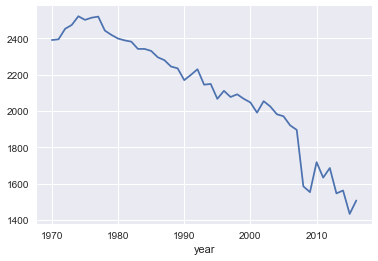

In [22]:
ts_df.count().plot();

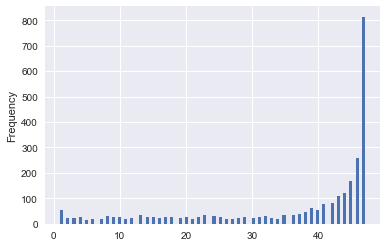

In [23]:
ts_df.T.count().plot(kind='hist', bins=100);

In [24]:
a = pd.DataFrame({"year_count":ts_df.T.count()})
a.head()

,year_count
fips_code,
01001,40
01003,45
01005,44
01007,12
01009,41


In [25]:
a.to_csv('year_counts_corn.csv')

# Counties with Complete Data

In [26]:
a[a.year_count==47].count()

year_count    814
dtype: int64

# Just under 30% of counties have Complete data

In [27]:
a[a.year_count==47].count()[0]/a.shape[0]

0.29407514450867051

# Check to see how many counties have at least 30 years (consecutive not a requirement)

In [28]:
a[a.year_count>=30].count()

year_count    2016
dtype: int64

# Nearly 73% of counties have >= 30 years data

In [29]:
a[a.year_count>=30].count()[0]/a.shape[0]

0.72832369942196529

In [192]:
full_data = ts_df[ts_df.index.isin(a[a.year_count==47].index.values)]
full_data

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7
05021,51.0,60.0,58.4,47.6,68.0,75.0,82.5,75.8,84.0,70.0,29.0,81.0,114.0,93.0,115.0,135.0,120.0,135.0,125.0,134.0,115.0,111.3,154.2,115.2,144.3,136.0,141.7,133.4,111.4,130.0,130.0,148.0,145.0,156.0,164.0,149.0,173.0,176.0,165.0,163.0,156.0,144.5,182.7,191.9,194.6,180.8,172.9
05031,47.0,42.0,41.4,42.6,40.6,51.4,62.4,58.0,64.0,65.0,24.0,81.0,86.0,72.0,100.0,140.0,88.0,130.0,130.0,129.0,88.0,114.7,140.4,70.2,132.1,126.0,132.0,129.1,86.0,102.0,130.0,130.0,123.0,154.0,160.0,136.0,145.0,184.0,170.0,168.0,169.6,147.3,191.1,189.3,183.8,179.9,184.4
05055,42.0,38.0,36.0,41.0,47.1,62.5,65.1,63.0,70.0,73.0,24.0,74.0,80.0,70.0,92.0,120.0,105.0,115.0,110.0,122.0,87.0,120.0,125.0,73.3,127.0,124.0,126.4,107.7,110.4,124.0,125.0,140.0,125.0,139.0,147.0,124.0,145.0,172.0,153.0,149.0,159.0,110.3,144.6,176.0,182.5,175.2,168.8
05067,47.0,44.0,41.7,36.0,32.5,55.1,76.0,66.0,88.0,64.0,24.0,63.0,104.0,92.0,105.0,110.0,105.0,115.0,105.0,119.0,92.0,103.4,159.4,96.6,129.8,119.0,120.0,109.1,110.4,158.0,140.0,157.0,147.0,140.0,151.0,130.0,156.0,149.0,150.0,153.0,150.0,147.4,166.9,174.7,173.0,168.9,147.3


In [410]:
full_data.to_csv("ts_corn_47yr_df.csv")

In [35]:
full_means_stds = [(full_data.iloc[i].mean(), full_data.iloc[i].std()) for i in range(full_data.shape[0])]
full_means_stds

[(82.04468085106383, 32.160952617506446),
 (83.89999999999999, 37.13783375012837),
 (85.7872340425532, 41.99167938812804),
 (89.62340425531916, 39.895238970420245),
 (92.07021276595745, 38.152223223689965),
 (124.21702127659572, 41.99690112350908),
 (114.04893617021277, 48.004700278656706),
 (108.7212765957447, 42.08043507054293),
 (112.5787234042553, 42.39412867557207),
 (149.30851063829786, 21.99659884566381),
 (157.47234042553194, 29.740886087554546),
 (143.19787234042553, 25.94751801284329),
 (155.25319148936168, 32.67382845152869),
 (112.28936170212764, 34.29288323964706),
 (109.39148936170211, 30.282545049749398),
 (109.88936170212766, 36.72285293716419),
 (127.49361702127659, 51.24229912134546),
 (98.39361702127658, 51.72397225849891),
 (123.19787234042556, 55.836136379672936),
 (88.08723404255318, 38.35425613829962),
 (91.95106382978723, 40.235053246059316),
 (132.04255319148933, 52.415388317458216),
 (99.75106382978724, 48.53969631558156),
 (124.97021276595746, 35.835699439268

In [36]:
data_46yrs = ts_df[ts_df.index.isin(a[a.year_count==46].index.values)]

In [37]:
data_46yrs.shape

(257, 47)

In [38]:
means_stds_46yrs = [(data_46yrs.iloc[i].mean(), data_46yrs.iloc[i].std()) for i in range(data_46yrs.shape[0])]
means_stds_46yrs

[(72.4391304347826, 31.23156151687918),
 (88.72173913043478, 43.46281635832061),
 (79.68695652173913, 37.079761528033664),
 (81.93695652173915, 31.449376313869895),
 (71.7, 26.359632437160844),
 (73.89565217391304, 35.496490947207974),
 (115.0478260869565, 46.59239680048158),
 (161.44782608695652, 46.9162456541462),
 (154.7869565217391, 23.43132384646816),
 (158.68695652173915, 29.893861195872102),
 (108.10217391304347, 25.313004906397506),
 (110.15, 23.06872582331133),
 (123.47826086956522, 23.522121153817718),
 (123.12391304347825, 17.813804694145475),
 (125.66956521739131, 22.300043543208286),
 (83.24565217391304, 35.26084833240364),
 (114.56304347826088, 45.6038319963753),
 (75.12608695652173, 34.68465837470578),
 (90.17826086956524, 34.18665050079883),
 (93.4695652173913, 45.49894196359695),
 (118.90434782608696, 56.08407956520575),
 (99.90869565217392, 46.18049047469171),
 (71.4608695652174, 36.1509949348923),
 (121.42391304347827, 49.374317141978935),
 (84.9391304347826, 48.0012

# Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [145]:
full_data.shape

(814, 47)

Fips Code: 01049


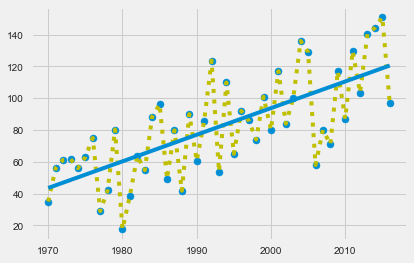

Fips Code: 17167


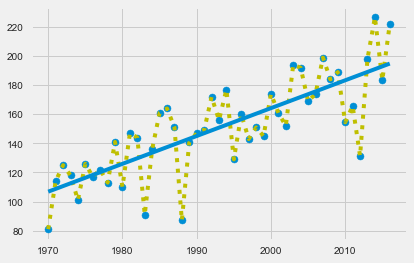

Fips Code: 19007


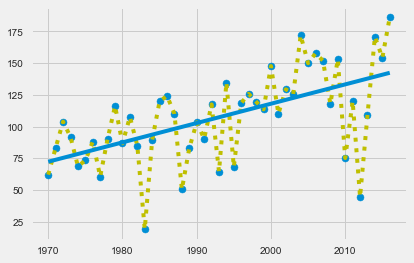

Fips Code: 19171


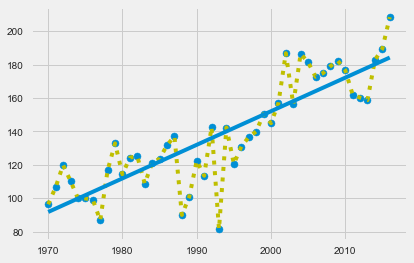

Fips Code: 24047


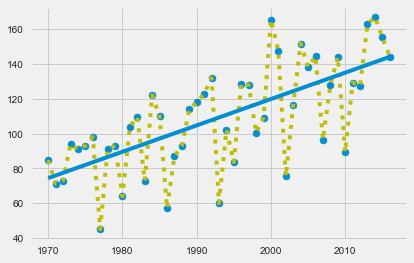

Fips Code: 27147


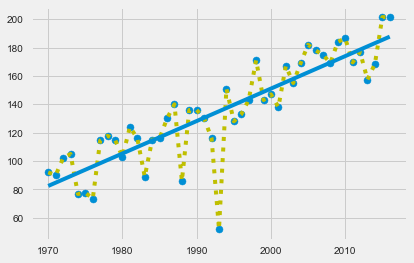

Fips Code: 31089


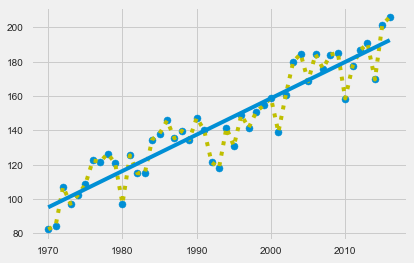

Fips Code: 38003


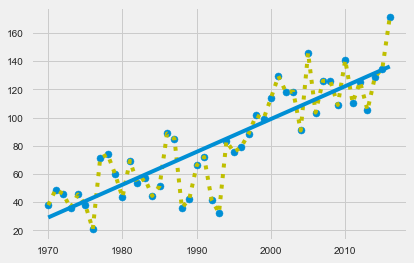

Fips Code: 42071


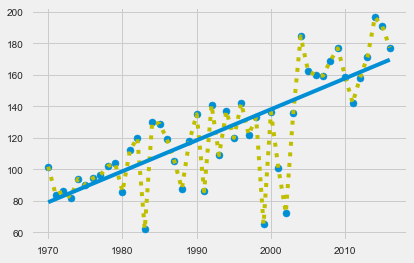

Fips Code: 48149


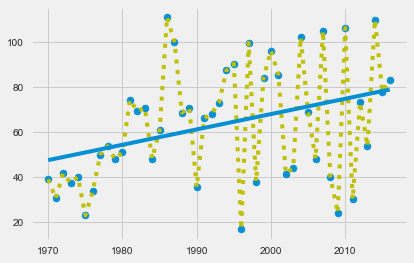

Fips Code: 55109


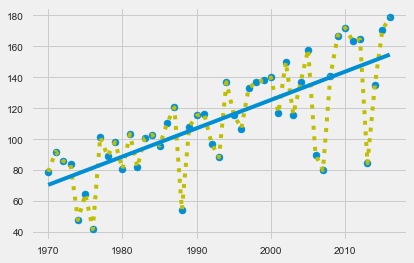

In [146]:
for i in range(0, 801, 80):
    print("Fips Code: {}".format(full_data.ix[i].name))
    X = np.array(full_data.columns).reshape(-1,1)
    y = full_data.ix[i].values
    lm = LinearRegression()
    lm.fit(X, y)
    preds = lm.predict(X)
    plt.scatter(X, y)
    plt.plot(X, y, 'y:')
    plt.plot(X, preds)
    plt.show();

In [194]:
full_test = full_data.copy()
full_test.head()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


In [211]:
pop_list = np.random.randint(1970,2017, full_data.shape[0])
pop_list[:5]

array([1980, 1996, 1988, 2002, 2005])

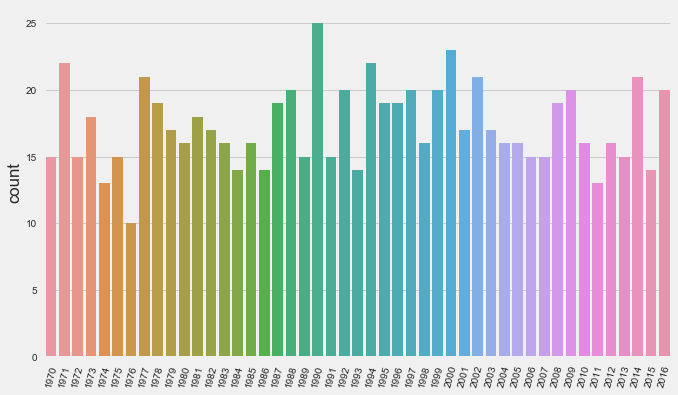

In [320]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
sns.countplot(pop_list);

In [226]:
true = [full_data.iloc[i][yr] for i, yr in enumerate(pop_list)]
true[:5]

[17.600000000000001, 80.0, 31.100000000000001, 107.0, 143.0]

In [227]:
for i, yr in enumerate(pop_list):
    full_test.iloc[i][yr] = np.nan 

In [229]:
full_test.head()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,NaN,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,NaN,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,NaN,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,NaN,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,NaN,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7



 For Random Year: 1980 and Fips Code: 01049
 True: 17.60
 Predicted: 62.09
 Residual: 44.49


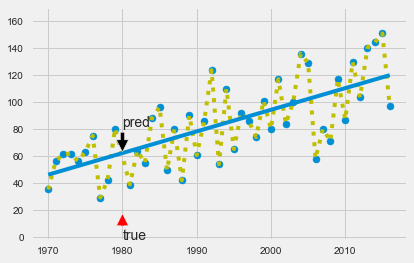


 For Random Year: 1988 and Fips Code: 17167
 True: 87.00
 Predicted: 142.60
 Residual: 55.60


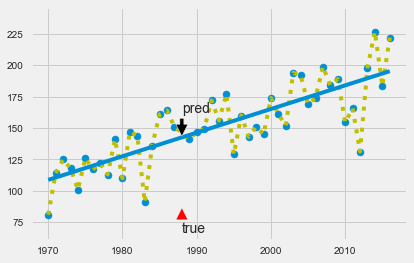


 For Random Year: 1997 and Fips Code: 19007
 True: 125.80
 Predicted: 113.16
 Residual: -12.64


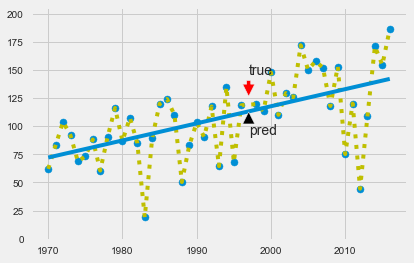


 For Random Year: 2014 and Fips Code: 19171
 True: 182.70
 Predicted: 179.98
 Residual: -2.72


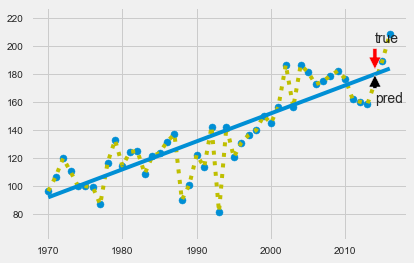


 For Random Year: 1979 and Fips Code: 24047
 True: 93.00
 Predicted: 87.82
 Residual: -5.18


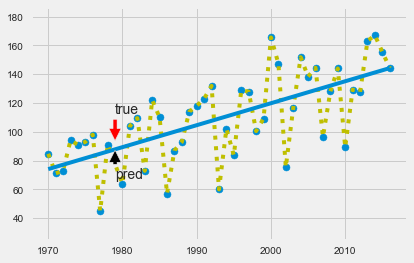


 For Random Year: 1996 and Fips Code: 27147
 True: 133.00
 Predicted: 142.12
 Residual: 9.12


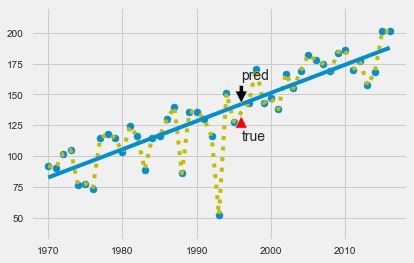


 For Random Year: 1997 and Fips Code: 31089
 True: 141.50
 Predicted: 152.54
 Residual: 11.04


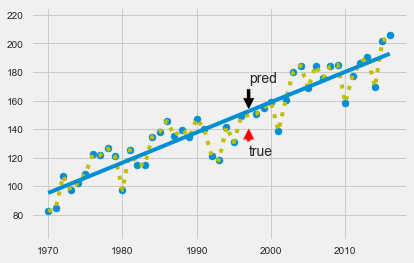


 For Random Year: 1991 and Fips Code: 38003
 True: 72.10
 Predicted: 78.23
 Residual: 6.13


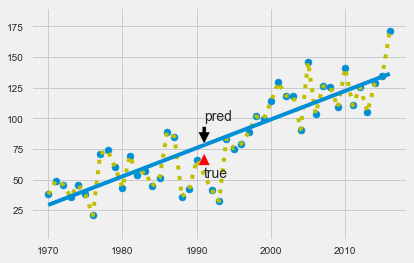


 For Random Year: 2003 and Fips Code: 42071
 True: 135.60
 Predicted: 144.35
 Residual: 8.75


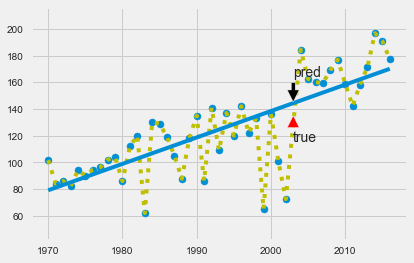


 For Random Year: 1993 and Fips Code: 48149
 True: 73.00
 Predicted: 62.95
 Residual: -10.05


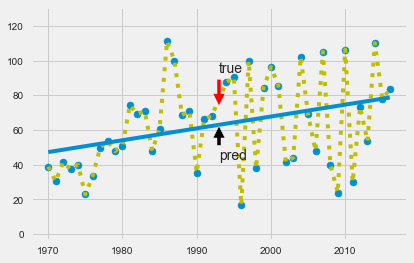


 For Random Year: 2012 and Fips Code: 55109
 True: 164.50
 Predicted: 146.25
 Residual: -18.25


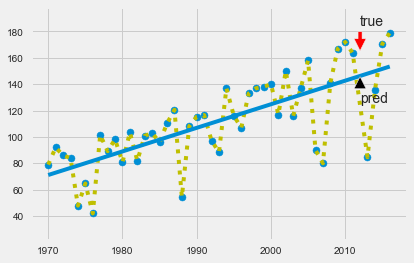

In [301]:
for i in range(0, 801, 80):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.ix[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    pred_val = preds[pop_list[i]-1970]
    pred_yr = pop_list[i]
    
    print("\n For Random Year: {} and Fips Code: {}\n True: {:.2f}\n Predicted: {:.2f}\n Residual: {:.2f}"\
          .format(pred_yr, full_test.ix[i].name, true[i], pred_val, pred_val-true[i]))
    if pred_val > true[i]:
        dist = 20
    else:
        dist = -20
    plt.ylim(min(true[i], min(y))-20, max(y)+20)
    plt.annotate('pred', xy=(pred_yr, pred_val), xytext=(pred_yr, pred_val+dist),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('true', xy=(pred_yr, true[i]), xytext=(pred_yr, true[i]-dist),
                arrowprops=dict(facecolor='red', shrink=0.05))
    plt.scatter(X_miss, y)
    plt.plot(X_miss, y, 'y:')
    plt.plot(X_full, preds)
    plt.show();
plt.close('all')

In [302]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.ix[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

In [312]:
len(true), len(y_pred)

(814, 814)

In [314]:
RSQUARED = r2_score(true, y_pred)
RSQUARED

0.66101042843654134

In [315]:
RMSE = np.sqrt(mean_squared_error(true, y_pred))
RMSE

21.807522143130623

In [89]:
import warnings
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [373]:
rng = pd.date_range('1/1/1970', periods=47, freq='Y')
y = pd.DataFrame({'yields':full_data.ix[0].values},index=rng)

y.head(3)

,yields
1970-12-31,35.0
1971-12-31,56.0
1972-12-31,61.2


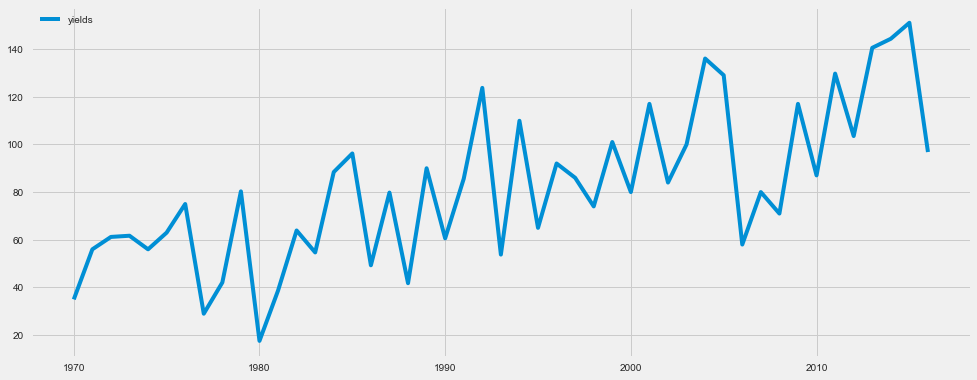

In [374]:
y.plot(figsize=(15, 6))
plt.show();

In [375]:
p = d = q = range(0, 2)
p, d, q

(range(0, 2), range(0, 2), range(0, 2))

In [376]:
pdq = list(itertools.product(p, d, q))

In [380]:
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 0, 1) x (0, 1, 0, 1)
SARIMAX: (0, 1, 0) x (0, 1, 1, 1)
SARIMAX: (0, 1, 0) x (1, 0, 0, 1)


In [383]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 1) - AIC:503.25109305749487
ARIMA(0, 0, 0)x(0, 1, 1, 1) - AIC:415.5517868593641
ARIMA(0, 0, 0)x(1, 0, 0, 1) - AIC:456.9412210035913
ARIMA(0, 0, 0)x(1, 0, 1, 1) - AIC:418.8429065060254
ARIMA(0, 0, 0)x(1, 1, 0, 1) - AIC:429.24006528877857
ARIMA(0, 0, 0)x(1, 1, 1, 1) - AIC:416.42927935722145
ARIMA(0, 0, 1)x(0, 0, 0, 1) - AIC:503.25109305749487
ARIMA(0, 0, 1)x(0, 0, 1, 1) - AIC:487.21221470583873
ARIMA(0, 0, 1)x(0, 1, 0, 1) - AIC:415.5517868593641
ARIMA(0, 0, 1)x(0, 1, 1, 1) - AIC:408.8543056736197
ARIMA(0, 0, 1)x(1, 0, 0, 1) - AIC:418.8429040207647
ARIMA(0, 0, 1)x(1, 0, 1, 1) - AIC:411.98401515962564
ARIMA(0, 0, 1)x(1, 1, 0, 1) - AIC:416.429279343445
ARIMA(0, 0, 1)x(1, 1, 1, 1) - AIC:409.811272309149
ARIMA(0, 1, 0)x(0, 0, 1, 1) - AIC:415.5517868593641
ARIMA(0, 1, 0)x(0, 1, 1, 1) - AIC:433.9165865595815
ARIMA(0, 1, 0)x(1, 0, 0, 1) - AIC:429.24006528877857
ARIMA(0, 1, 0)x(1, 0, 1, 1) - AIC:416.42927935722145
ARIMA(0, 1, 0)x(1, 1, 0, 1) - AIC:454.5073291169694
ARIMA(

In [384]:
# ARIMA(0, 1, 1)x(0, 1, 1, 1)

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1451.607     -0.001      0.999   -2846.098    2844.098
ma.S.L1       -1.0000   1457.734     -0.001      0.999   -2858.106    2856.106
sigma2       552.5942   1.61e+06      0.000      1.000   -3.15e+06    3.15e+06


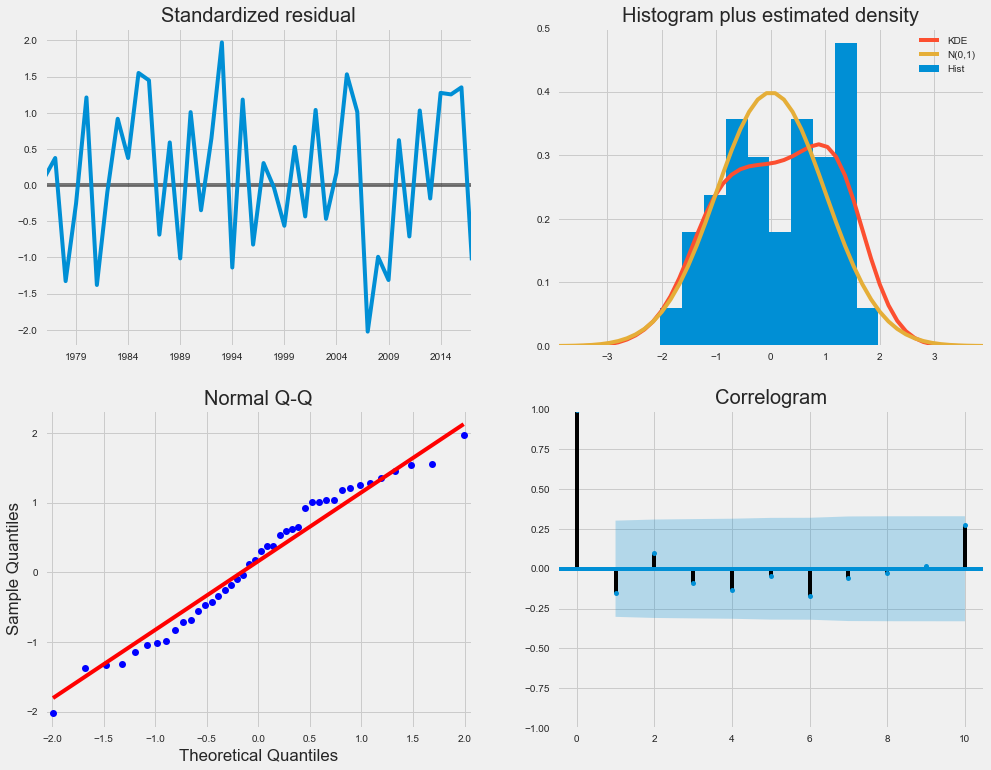

In [385]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [387]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=False)
pred_ci = pred.conf_int()

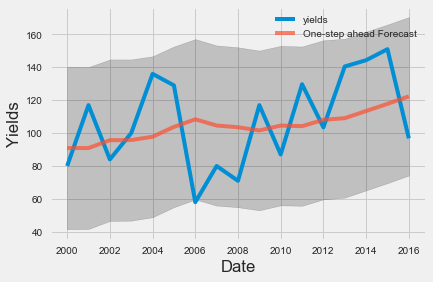

In [388]:
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')
plt.legend()

plt.show();

In [ ]:
from sklearn.metrics import m

In [402]:
y_forecasted = pred.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 26.75


In [403]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

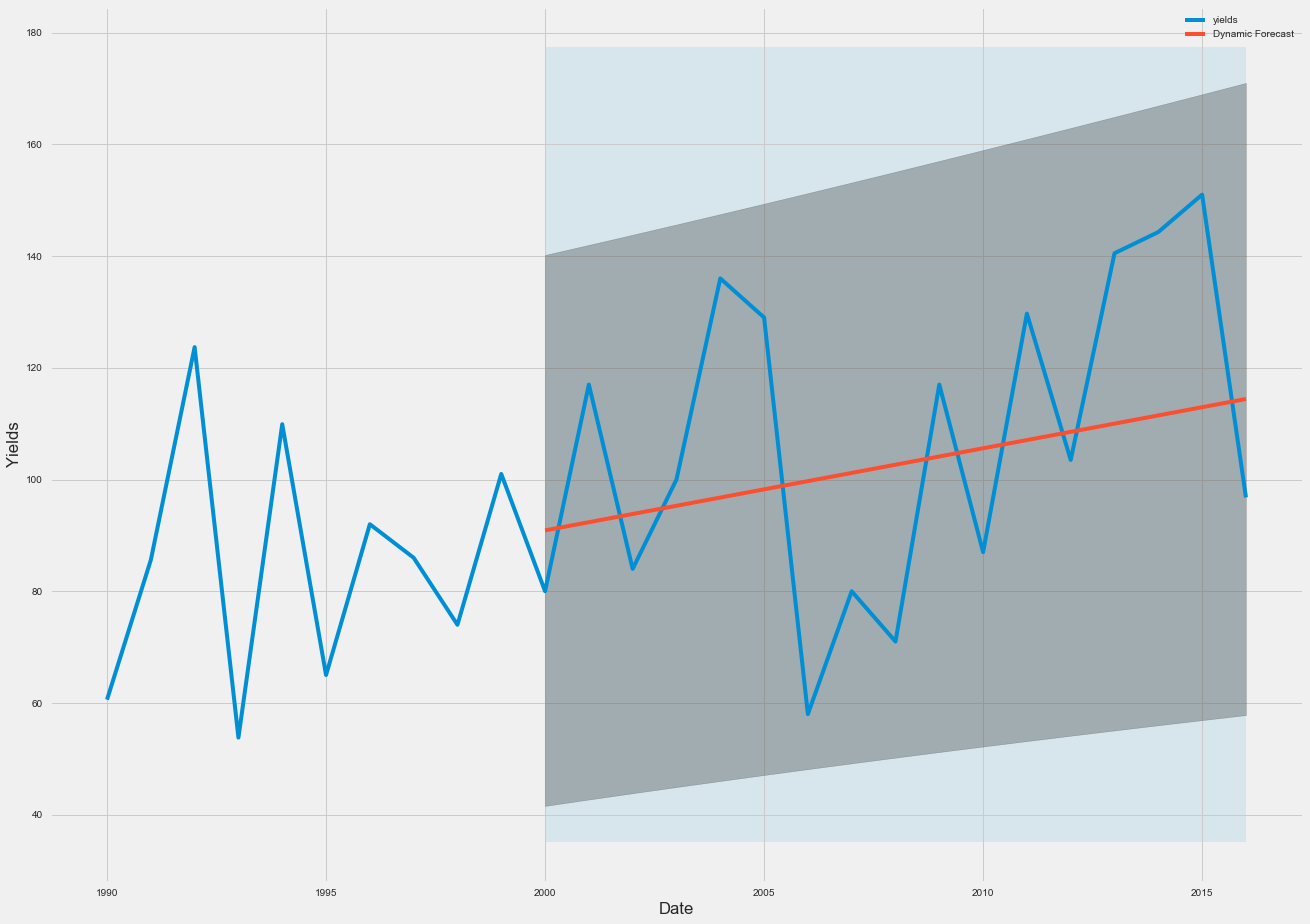

In [404]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show()

In [405]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2000-12-31':]['yields']

print('The RMSE of our forecasts is {:.2f}'.format(np.sqrt(mean_squared_error(y_forecasted, y_truth))))

The RMSE of our forecasts is 25.82


In [407]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

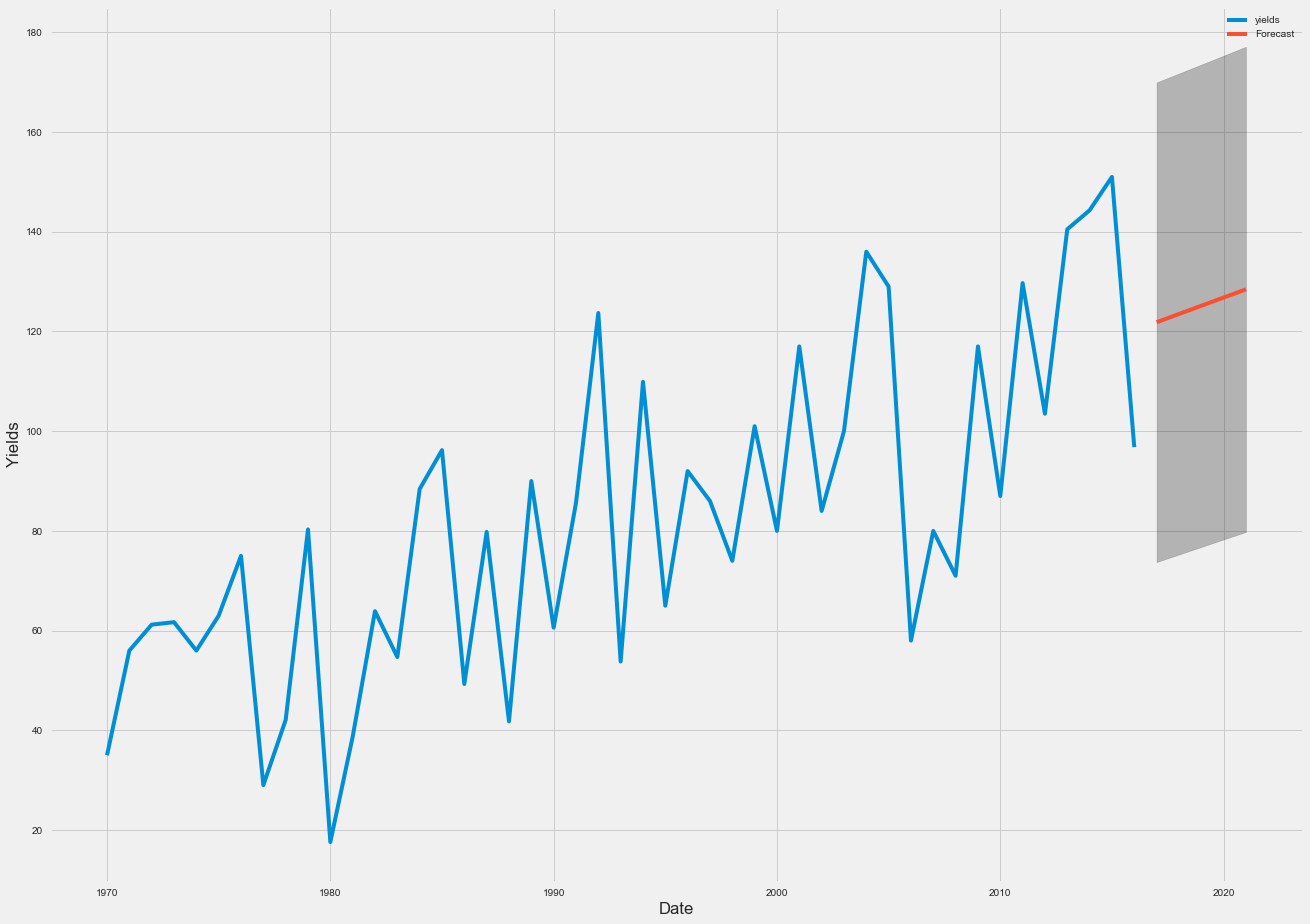

In [408]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Yields')

plt.legend()
plt.show()

# States w/ Complete Data

In [167]:
complete_data = corn_yields[corn_yields.fips_code.isin(a[a.year_count==47].index.values)]

complete_data['state_alpha'].unique()

array(['AL', 'AR', 'CA', 'CO', 'DE', 'GA', 'IL', 'IN', 'IA', 'KS', 'KY',
       'LA', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NJ', 'NC', 'ND',
       'OH', 'PA', 'SC', 'SD', 'TN', 'TX', 'VA', 'WV', 'WI', 'WY'], dtype=object)

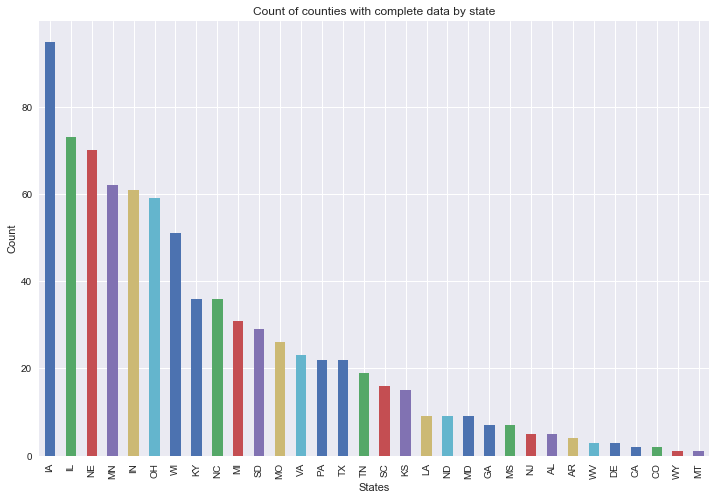

In [168]:
complete_data_states = complete_data['state_alpha'].value_counts()/47
ax = complete_data_states.plot(kind='bar', figsize=(12,8), title="Count of counties with complete data by state")
ax.set(xlabel='States', ylabel='Count');

In [ ]:
atleast30years = ts_df[ts_df.index.isin(a[a.year_count>=30].index.values)]

means_stds = [(atleast30years.iloc[i].mean(),atleast30years.iloc[i].std()) for i in range(atleast30years.shape[0])]

def gaussian_re(p, q):
    "Calculate the relative entropy between two univariate gaussians"
    return np.log2(q[1]/p[1])+(p[1]**2 + (p[0]-q[0])**2)/(2*q[1]**2)-0.5

idx = 0 
# Calculate KL divergence for idx against all distribution D(q||p) where q is the gaussian dist for idx
test_lst = [abs(gaussian_re(means_stds[idx], means_stds[i])) for i in range(len(means_stds))]

print("Value: {} for index: {}. K-L divergence for identical distributions should be Zero.".format(test_lst.pop(idx), idx))
test_lst.insert(idx, 999) # replace popped value of 0 w/ 999 as a placeholder (helps with indexing later)

best_dist = test_lst.index(min(test_lst))
print("Lowest value for R(p|q): {} occurs at index: {}. (for index: {})".format(test_lst[best_dist], best_dist, idx))
print("Best dist fit for fips_code: {} is {}.".format(atleast30years.iloc[idx].name, atleast30years.iloc[best_dist].name))
sns.distplot(atleast30years.iloc[idx].dropna(), color='g')
sns.distplot(atleast30years.iloc[best_dist].dropna());

# How's Iowa looking?

In [18]:
len(corn_yields[['state_alpha','fips_code']][corn_yields.state_alpha == 'IA']['fips_code'].unique())

99

In [19]:
missing_IA_df = corn_yields[~corn_yields.fips_code.isin(a[a.year_count==47].index.values)]
findIA_df = missing_IA_df[missing_IA_df.state_alpha == 'IA'].pivot(index='fips_code', columns='year', values='nassyield')
findIA_df

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19129,81.6,93.0,113.7,108.3,51.7,79.1,95.4,56.3,107.0,122.3,99.0,117.0,103.1,90.0,98.2,128.6,130.2,126.7,107.7,109.4,120.5,131.9,156.0,75.0,147.4,105.9,133.2,135.8,123.7,128.2,135.2,132.5,110.3,131.6,184.8,163.7,159.5,147.4,156.0,191.2,160.2,155.0,128.8,171.0,184.9,188.4
19135,79.0,90.8,103.6,86.9,60.1,72.4,91.8,45.0,90.0,107.1,94.3,114.5,78.6,29.8,91.6,114.5,112.8,107.3,46.6,94.5,112.9,107.2,117.3,61.5,149.0,84.1,112.8,127.2,111.9,110.8,135.8,115.9,158.0,129.6,171.3,154.3,137.0,161.3,136.0,156.3,77.4,112.5,67.3,115.3,175.7,180.0
19173,67.7,92.6,104.5,98.5,32.5,55.0,83.2,65.8,88.7,109.0,65.4,115.0,82.3,44.6,60.6,122.1,115.3,109.5,60.0,95.5,96.6,118.1,127.8,61.6,135.9,65.2,112.8,117.4,119.2,115.6,140.7,114.9,126.6,116.4,157.9,156.8,142.4,137.6,135.0,150.2,122.2,140.5,91.7,136.2,178.8,159.9
19175,77.5,90.8,102.3,96.9,44.6,63.5,94.5,40.3,92.5,108.8,80.7,116.6,90.4,64.0,81.5,125.4,108.5,115.9,67.3,103.0,111.0,124.8,130.0,53.3,143.8,71.8,120.7,117.4,129.7,140.8,136.5,127.3,142.2,106.7,160.4,157.2,153.6,154.1,148.0,153.8,113.2,132.6,87.3,137.0,176.1,183.0


In [20]:
years_set = {i for i in range(1970, 2017)}
years_set.difference(set(findIA_df.columns))

{2015}

# All 4 IOWA counties w/ missing data are missing only one year: 2015

In [172]:
colsIA = [col for col in ts_df.T.columns if str(col).startswith('19') and len(str(col))==5]
pd.DataFrame(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsIA].loc[2015]).T

fips_code,19001,19003,19005,19007,19009,19011,19013,19015,19017,19019,19021,19023,19025,19027,19029,19031,19033,19035,19037,19039,19041,19043,19045,19047,19049,19051,19053,19055,19057,19059,19061,19063,19065,19067,19069,19071,19073,19075,19077,19079,19081,19083,19085,19087,19089,19091,19093,19095,19097,19099,19101,19103,19105,19107,19109,19111,19113,19115,19117,19119,19121,19123,19125,19127,19129,19131,19133,19135,19137,19139,19141,19143,19145,19147,19149,19151,19153,19155,19157,19159,19161,19163,19165,19167,19169,19171,19173,19175,19177,19179,19181,19183,19185,19187,19189,19191,19193,19195,19197
2015,176.5,169.6,175.4,154.3,189.8,187.5,192.9,192.3,203.1,191.6,202.7,193.3,194.7,195.4,193.7,188.8,196.9,209.6,202.8,152.4,202.8,193.2,188.2,199.1,182.4,142.4,162.7,195.8,176.0,194.5,197.0,203.3,191.8,196.5,200.2,179.9,189.0,199.9,179.2,198.1,201.2,199.3,189.5,178.4,202.1,194.8,203.1,199.3,190.6,198.9,168.2,187.1,186.6,181.0,199.0,145.1,189.2,181.7,154.8,196.0,169.6,190.3,178.1,194.9,NaN,202.1,169.0,NaN,185.2,177.7,205.2,204.7,165.8,197.5,203.6,205.5,187.0,204.0,197.8,147.8,204.8,195.9,195.3,201.9,188.0,189.5,NaN,NaN,158.3,159.3,170.3,195.0,158.0,201.0,203.6,185.6,202.3,202.1,198.4


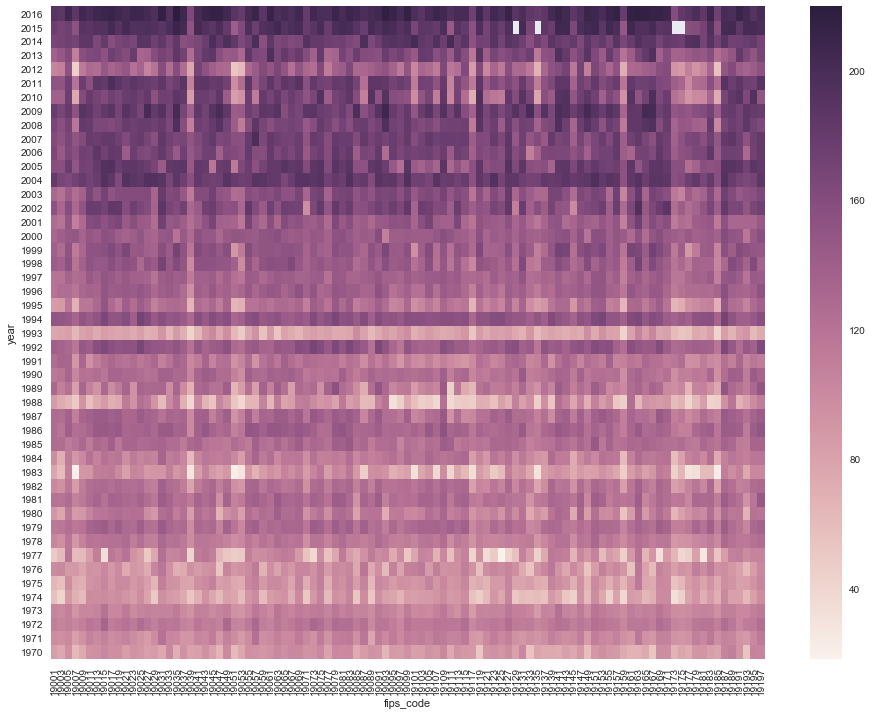

In [23]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsIA]);

# Heatmap for Alabama

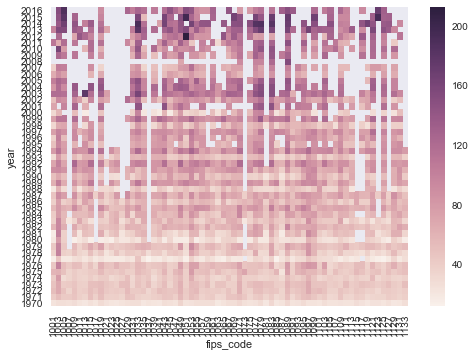

In [24]:
colsAL = [col for col in ts_df.T.columns if str(col).startswith('1') and len(str(col))==4]
sns.heatmap(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsAL]);

# Heatmap for California

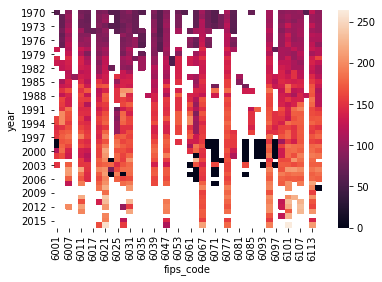

In [166]:
colsCA = [col for col in ts_df.T.columns if str(col).startswith('6') and len(str(col)) ==4]
sns.heatmap(ts_df.T[colsCA]);

In [168]:
ts_df.T[colsCA].describe()

fips_code,6001,6005,6007,6009,6011,6013,6017,6019,6021,6023,6025,6029,6031,6033,6035,6037,6039,6045,6047,6049,6053,6059,6061,6065,6067,6069,6071,6073,6077,6079,6081,6083,6085,6089,6093,6095,6097,6099,6101,6103,6107,6111,6113,6115
count,14.000000,26.000000,38.000000,1.0,42.000000,37.000000,1.0,41.000000,46.000000,7.000000,27.000000,41.000000,42.000000,8.000000,9.000000,1.0,38.000000,9.000000,43.000000,2.000000,24.000000,1.0,21.000000,33.000000,47.000000,9.000000,16.000000,4.0,46.000000,14.000000,2.000000,9.000000,8.00000,5.000000,5.0,47.000000,14.000000,41.000000,45.000000,38.000000,41.000000,2.000000,46.000000,37.000000
mean,118.642857,135.769231,145.668421,100.0,146.104762,124.202703,70.0,132.778049,161.447826,65.471429,127.688889,132.951220,145.069048,79.875000,79.666667,120.0,129.802632,60.277778,139.467442,52.500000,135.833333,60.0,129.380952,100.645455,149.308511,62.666667,50.387500,60.0,154.786957,103.835714,100.000000,41.844444,135.00000,35.000000,0.0,157.472340,85.000000,134.763415,158.620000,142.976316,152.826829,92.500000,158.686957,135.294595
std,56.533036,45.655289,31.187022,NaN,36.983239,28.255299,NaN,34.886677,46.916246,60.770517,46.472451,45.691072,41.756953,12.844537,20.143237,NaN,32.727709,2.017286,31.799152,3.535534,32.040283,NaN,53.879919,52.908501,21.996599,36.455452,62.892977,40.0,23.431324,40.011452,14.142136,66.216654,28.41026,78.262379,0.0,29.740886,68.808542,27.398985,39.381223,36.734272,39.439764,45.961941,29.893861,38.775909
min,0.000000,70.000000,92.000000,100.0,76.000000,71.000000,70.0,80.000000,80.000000,0.000000,60.000000,0.000000,80.000000,71.000000,60.000000,120.0,79.000000,57.500000,88.000000,50.000000,74.000000,60.0,0.000000,0.000000,99.000000,0.000000,0.000000,0.0,103.000000,60.000000,90.000000,0.000000,70.00000,0.000000,0.0,104.000000,0.000000,90.000000,98.000000,91.000000,96.000000,60.000000,104.000000,0.000000
25%,120.525000,87.500000,123.500000,100.0,131.100000,110.000000,70.0,95.000000,125.750000,30.000000,95.000000,95.000000,108.200000,71.750000,65.000000,120.0,98.500000,60.000000,110.600000,51.250000,119.000000,60.0,110.000000,70.000000,133.250000,74.000000,0.000000,60.0,139.250000,63.250000,95.000000,0.000000,132.50000,0.000000,0.0,133.900000,0.000000,110.000000,129.700000,107.750000,112.000000,76.250000,132.750000,113.400000
50%,144.400000,150.000000,138.900000,100.0,150.800000,128.800000,70.0,142.300000,171.350000,60.000000,147.500000,139.900000,150.000000,72.000000,70.000000,120.0,137.550000,60.000000,140.000000,52.500000,141.000000,60.0,140.000000,105.000000,151.000000,75.000000,30.000000,80.0,161.250000,97.500000,100.000000,0.000000,145.00000,0.000000,0.0,162.000000,125.000000,135.700000,155.500000,145.000000,171.100000,92.500000,164.750000,127.500000
75%,153.625000,169.650000,168.675000,100.0,164.725000,146.300000,70.0,160.300000,196.875000,79.150000,168.550000,166.700000,173.325000,85.750000,105.000000,120.0,159.425000,60.000000,165.850000,53.750000,152.500000,60.0,164.300000,125.000000,163.050000,80.000000,68.750000,80.0,169.875000,146.250000,105.000000,80.000000,150.00000,0.000000,0.0,180.900000,147.500000,157.700000,182.100000,172.700000,181.300000,108.750000,178.600000,170.000000
max,160.000000,200.000000,212.500000,100.0,221.400000,171.400000,70.0,196.300000,255.400000,180.000000,193.300000,217.800000,227.800000,100.000000,106.000000,120.0,181.800000,65.000000,195.700000,55.000000,178.000000,60.0,200.000000,228.800000,213.500000,100.000000,185.000000,80.0,191.000000,156.700000,110.000000,163.300000,160.00000,175.000000,0.0,201.900000,150.000000,191.200000,264.100000,223.300000,232.300000,125.000000,215.000000,196.300000


# Heatmap of all data

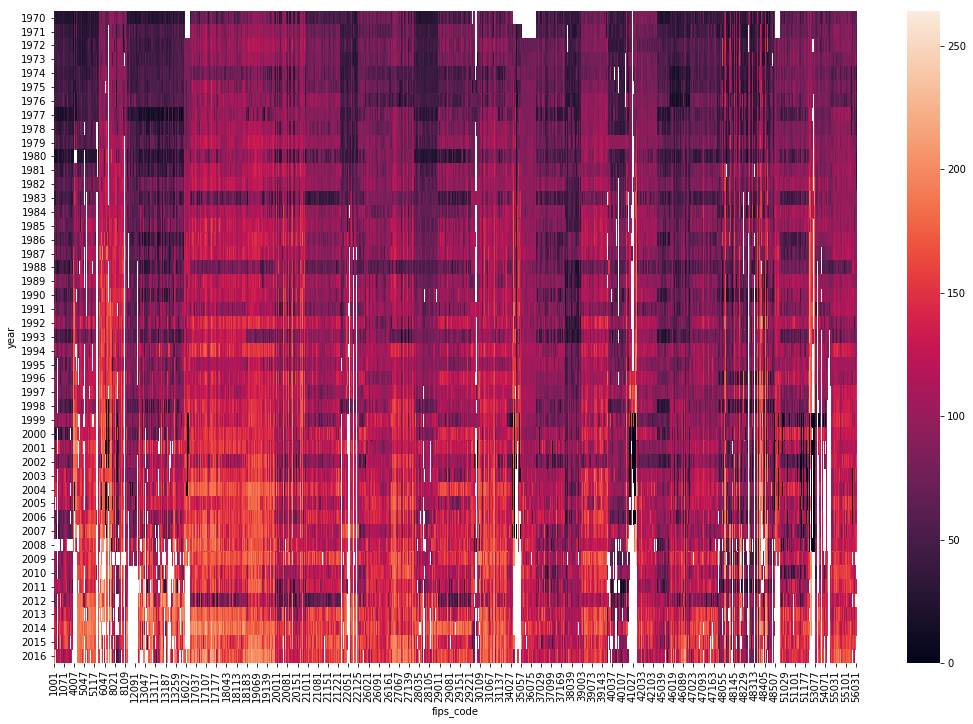

In [172]:
fig, ax = plt.subplots(figsize=(18, 12))

sns.heatmap(ts_df.T);